# Projets -  Idées innovantes d’applications en lien avec l'alimentation <br /> <font color='green'> -- Bonnes habitudes alimentaires  </font> 
## Résumé 
On veut savoir les aliments les plus adapté pour une personne que envisage d'acquérir des bonnes habitudes alimentaires. On cherche donc à prédire la présence de graisses saturées, omega 3, omega 6, omega 9, du sel et sucre non nécessaire, vitamines, fibres, minéraux, protéines et calcium. Cela en évitant les additifs et on privilégient les aliments avec un nutriscore et ecoscore favorable.
# Bibliothèques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm
from pathlib import Path
from myfile import remove_outlier,isnull_values_sum,plot_box_plot,file_len,read_csv_morceaux_nutriscore,plot_function,\
                   scatter_plot_nutriscore
import warnings
warnings.simplefilter(action='ignore', category=Warning)    

# Données utilisées

In [2]:
pd.set_option("display.precision", 2)          
pd.set_option("display.max.columns", None)    
pd.set_option("display.max.rows", None)

dir_data = Path('../../DATA/P3/') 
dir_fig  = Path('../../FIGURES/P3/')
file1    = Path(str(dir_data) + "/en.openfoodfacts.org.products.csv")
dir_data_abs= Path(file1).parent.absolute()

region = 'GLOBAL_'
header = "/head_GLOBAL.xlsx"
file2 = Path(str(dir_data) + "/NScore.openfoodfacts.org.products.csv")
file3 = Path(str(dir_data) + "/Projet_NScore.openfoodfacts.org.products.csv")   

## Telechargement des données

In [3]:
if file2.exists ():
    new_df =pd.read_csv(file2,  sep='\t', encoding='utf-8', low_memory=False)
    print ("Fichier existe")
else:
    maxrow0=0
    len_file1=file_len(file1)
    deltaline =500000
    for maxrow in range(0,len_file1,deltaline):
        print(maxrow+deltaline,'sur',len_file1) 
        read_csv_morceaux_nutriscore(file1,maxrow,deltaline,'nutriscore_grade',str(dir_data_abs),region)
            
    df = []
    for maxrow in range(0,len_file1,deltaline):
        file_new = Path(str(dir_data_abs) +'/' + str(region)  + str(maxrow+deltaline)+".csv", low_memory=False)
        df_in =pd.read_csv(file_new,  sep='\t', encoding='utf-8')
        df.append(df_in)
        
    new_df = pd.concat(df)
    # Creer un fichier .csv avec les donnees du marché mondial
    new_df.to_csv (file2,  sep='\t', encoding='utf-8') 
    print ("Rassembler les fichiers pour le marché Mundial avec nutriscore non nulle")
    new_df.head().T.to_excel(Path(str(dir_data) + str(header)))

Fichier existe


## Descriptive des donnee

In [4]:
desc= new_df.describe(include='all')
desc.head()

,Unnamed: 0,Unnamed: 0.1,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,683119.00,683119.00,683119,683119,683118,6.83e+05,683119,6.83e+05,683119,680769,3591,91500,261689,195992,195987,4300,490162,490145,683117,683117,683117,53889,53823,53823,87079,87054,210688,210690,210690,78838,78828,47104,0.0,50611,115373,156092,682218,682217,682217,483446,156503,0.0,80305,91816,91816,351070,347695.00,0.0,483446.00,0.0,290812,290812,483446.00,0.0,9346,483446.00,0.0,29092,683119.00,683119,455600.0,683062,683119,683119,683119,683119,234585,347180.00,347180,683117,683117,443073,443073,335479,335479,345577,345577,109986.00,641872.00,681385.00,826.00,681342.00,681321.00,17.00,3.00,2.00e+00,8.00,11.00,8.00,14.00,6.00,81.00,30.00,4.00,7.00,13.00,5.00,40021.00,39983.0,1776.00,273.00,106.00,136.00,423.00,75.00,59.00,9.00,8.00,72.00,36.00,0.0,13.00,7.00,4.00,3.00,229537.00,233631.00,681068.00,681330.00,49.00,54.00,59.00,649.00

In [5]:
count = desc.T['count']

### Liste de variables nécessaires pour le projet

In [6]:
data_new =pd.DataFrame()
for name in desc.columns:
    if count[name]>100000:
        data_new[name]=new_df[name]

In [7]:
List_projet=['product_name','categories','nutriscore_grade','nutriscore_score','nova_group','ecoscore_grade_fr','ecoscore_score_fr',
             'countries_en','labels','allergens','additives_en','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n',
             'fat_100g','saturated-fat_100g','energy-kcal_100g','energy-kj_100g','energy_100g','carbohydrates_100g','cholesterol_100g',
             'trans-fat_100g','sugars_100g','proteins_100g','sodium_100g','fiber_100g','additives_n','iron_100g','ingredients_text']

List_projetz= data_new.columns 

In [8]:
List_projetz

Index(['Unnamed: 0', 'Unnamed: 0.1', 'code', 'url', 'creator', 'created_t',
       'created_datetime', 'last_modified_t', 'last_modified_datetime',
       'product_name', 'quantity', 'packaging', 'packaging_tags', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_en',
       'labels', 'labels_tags', 'labels_en', 'purchase_places', 'stores',
       'countries', 'countries_tags', 'countries_en', 'ingredients_text',
       'allergens', 'serving_size', 'serving_quantity', 'additives_n',
       'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'states', 'states_tags', 'states_en', 'brand_owner',
       'ecoscore_score_fr', 'ecoscore_grade_fr', 'main_category',
       'main_category_en', 'image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrit

In [9]:
filtered_df = data_new.loc[:,List_projet]

## Opérations de nettoyage des données

### Traiter les doublons

In [10]:
df_dup = filtered_df.duplicated().sum()
if df_dup>0:
    Nfiltered_df = filtered_df.drop_duplicates()
    print('Total doublons:  ',df_dup)

Total doublons:   19780


### Traiter les valeurs aberrants

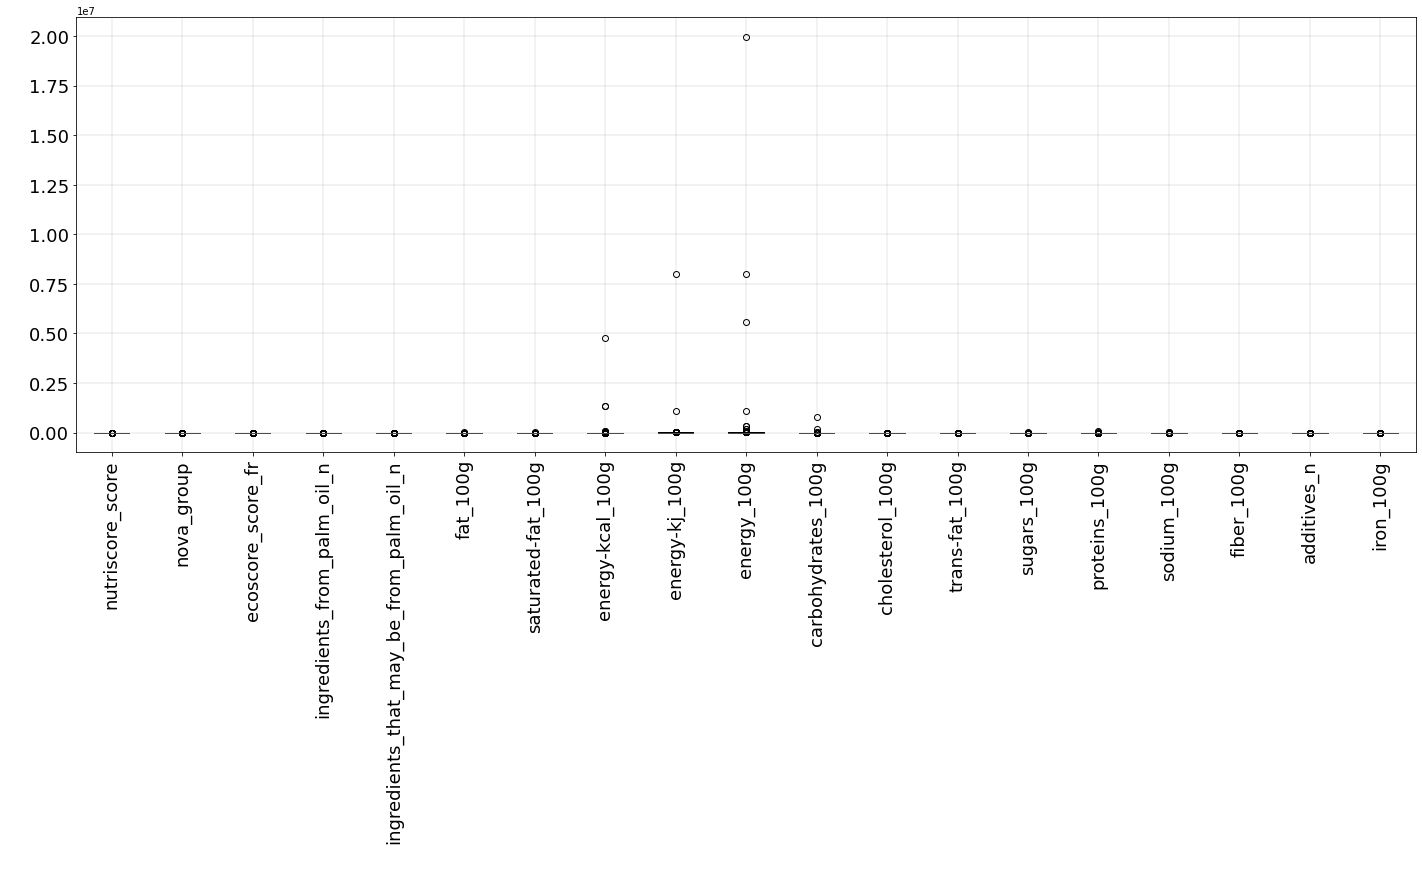

In [11]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('Before_remove_Outliers.jpeg'))

ylabel = " "
xlabel = " "
ax = plot_box_plot(Nfiltered_df,xlabel,ylabel,figure_name)

In [12]:
q1value=0.25
q3value=0.75
df1 = remove_outlier(Nfiltered_df,q1value,q3value)

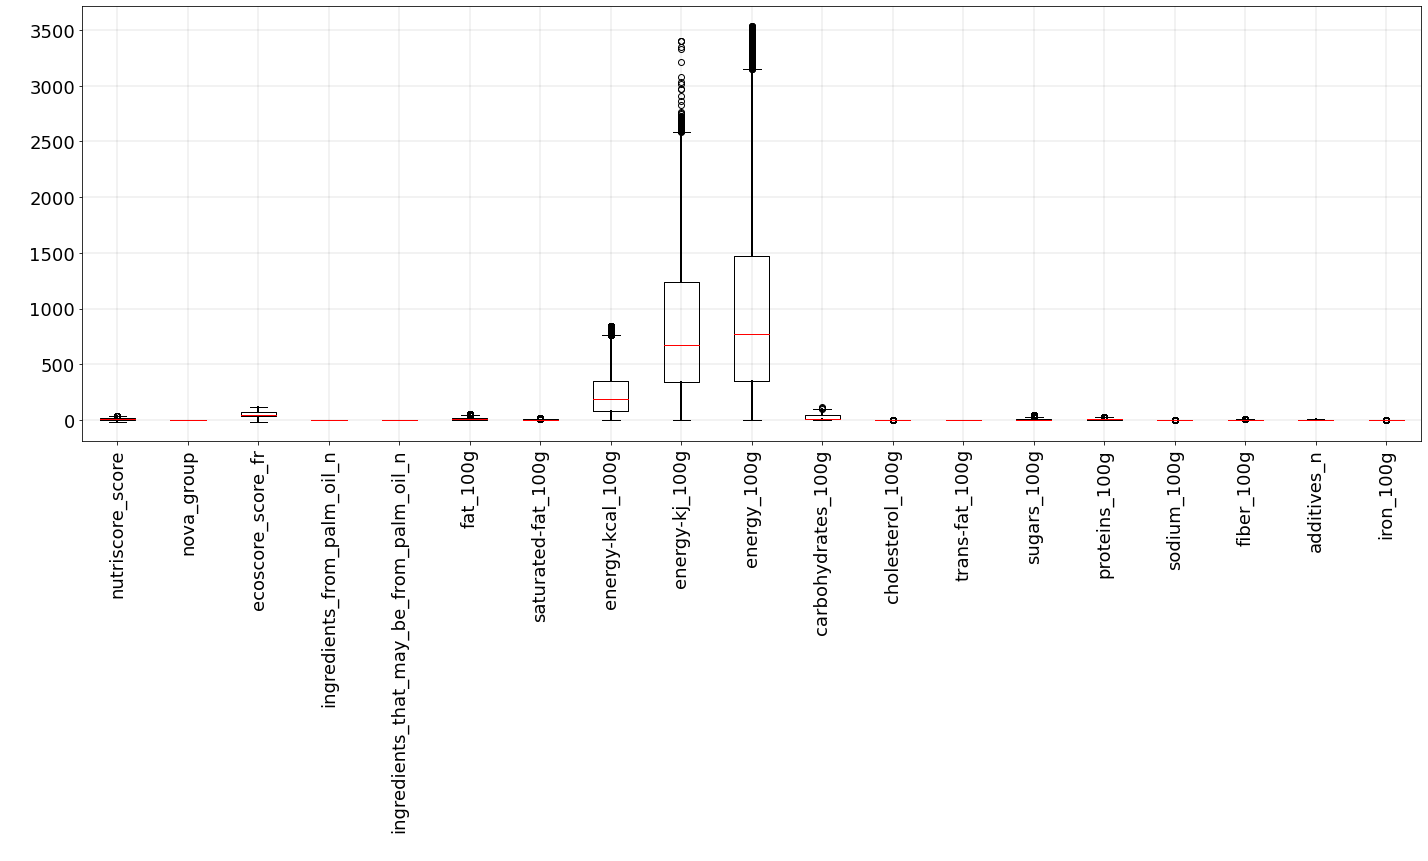

In [13]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('After_remove_Outliers.jpeg'))

ylabel = " "
xlabel = " "
ax = plot_box_plot(df1,xlabel,ylabel,figure_name)

Energy_cal_100g, energy_kj_100g et carbon-footprint-from-meat-or-fish_100g ont encore des valeurs 
aberrant.

### Traiter les valeurs manquants

In [14]:
Null = df1.isnull().sum() 
Na = df1.isna().sum()
df_NaN = pd.DataFrame(data=Na)
print(df_NaN)

                                              0
product_name                               1542
categories                                    2
nutriscore_grade                              0
nutriscore_score                              0
nova_group                               153769
ecoscore_grade_fr                        183561
ecoscore_score_fr                        183561
countries_en                                569
labels                                   254654
allergens                                299312
additives_en                             228130
ingredients_from_palm_oil_n              134559
ingredients_that_may_be_from_palm_oil_n  134559
fat_100g                                    426
saturated-fat_100g                          439
energy-kcal_100g                          23417
energy-kj_100g                           317848
energy_100g                                 426
carbohydrates_100g                          569
cholesterol_100g                        

Je fait le choix de, dans un premier temps, supprimer certain variables que sont truffée de données manquantes (plus de 50% de valeurs manquantes pour les données global  et en function de nutriscore dans les données Francais). J'ai egalement choisi de ne pas imputer les valeurs manquantes cars pour le projet, cela peut engendrer des erreurs sur la proposition des produits sains.


In [26]:
define_max_acepteble_nan= 2                                 # 2 c'est la moitié de NaN or Nul
df_final = isnull_values_sum(df1,define_max_acepteble_nan)
    
print(df1.shape)
print(df_final.shape)

190913.5
(381827, 28)
(381827, 21)


In [27]:
df_final=df_final.dropna()

In [28]:
desc_final =df_final.describe(include='all')
desc_final

,product_name,categories,nutriscore_grade,nutriscore_score,nova_group,ecoscore_grade_fr,ecoscore_score_fr,countries_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,fat_100g,saturated-fat_100g,energy-kcal_100g,energy_100g,carbohydrates_100g,sugars_100g,proteins_100g,sodium_100g,fiber_100g,additives_n,ingredients_text
count,52929,52929,52929,52929.00,52929.00,52929,52929.00,52929,52929.0,52929.0,52929.00,52929.00,52929.00,52929.00,52929.00,52929.00,52929.00,52929.00,52929.00,52929.00,52929
unique,41609,12298,5,NaN,NaN,5,NaN,831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47679
top,Cookies,"Snacks, Sweet snacks, Biscuits and cakes, Bisc...",a,NaN,NaN,b,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Tomatoes, tomato juice, salt, citric acid, cal..."
freq,150,5272,12429,NaN,NaN,20632,NaN,21002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39
mean,NaN,NaN,NaN,6.79,3.65,NaN,54.78,NaN,0.0,0.0,11.13,3.70,249.01,1039.87,29.69,10.73,7.02,0.34,2.27,1.68,NaN
std,NaN,NaN,NaN,8.63,0.48,NaN,23.73,NaN,0.0,0.0,11.52,4.62,174.37,728.78,26.52,12.45,6.09,0.27,2.25,1.81,NaN
min,NaN,NaN,NaN,-14.00,2.00,NaN,-14.00,NaN,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
25%,NaN,NaN,NaN,0.00,3.00,NaN,38.00,NaN,0.0,0.0,1.30,0.20,91.00,381.00,6.29,1.10,2.86,0.10,0.10,0.00,NaN
50%,NaN,NaN,NaN,5.00,4.00,NaN,55.00,NaN,0.0,0.0,7.14,1.75,208.00,866.00,17.86,4.50,5.80,0.30,1.70,1.00,NaN
75%,NaN,NaN,NaN,14.00,4.00,NaN,76.00,NaN,0.0,0.0,19.00,5.60,424.00,1772.00,57.00,18.46,9.10,0.47,3.60,3.00,NaN


Les variables Ingredients_from_palm_oil_n et ingredients_that_may_be_from_palm_oil_n sont remplies de 0. Nous pouvons donc également supprimer ces variables.

### traiter les variables remplie de zéros

In [29]:

for k in desc_final.columns:
    if desc_final[k]['std']==0: 
        print(k)
        df_final=df_final.drop([k],axis=1) 
        

ingredients_from_palm_oil_n
ingredients_that_may_be_from_palm_oil_n


## Données retenue pour le projet

In [30]:
df_final.to_csv (file3, sep='\t', encoding='utf-8')
print ("Creater le fichier pour le projet ")

Creater le fichier pour le projet 


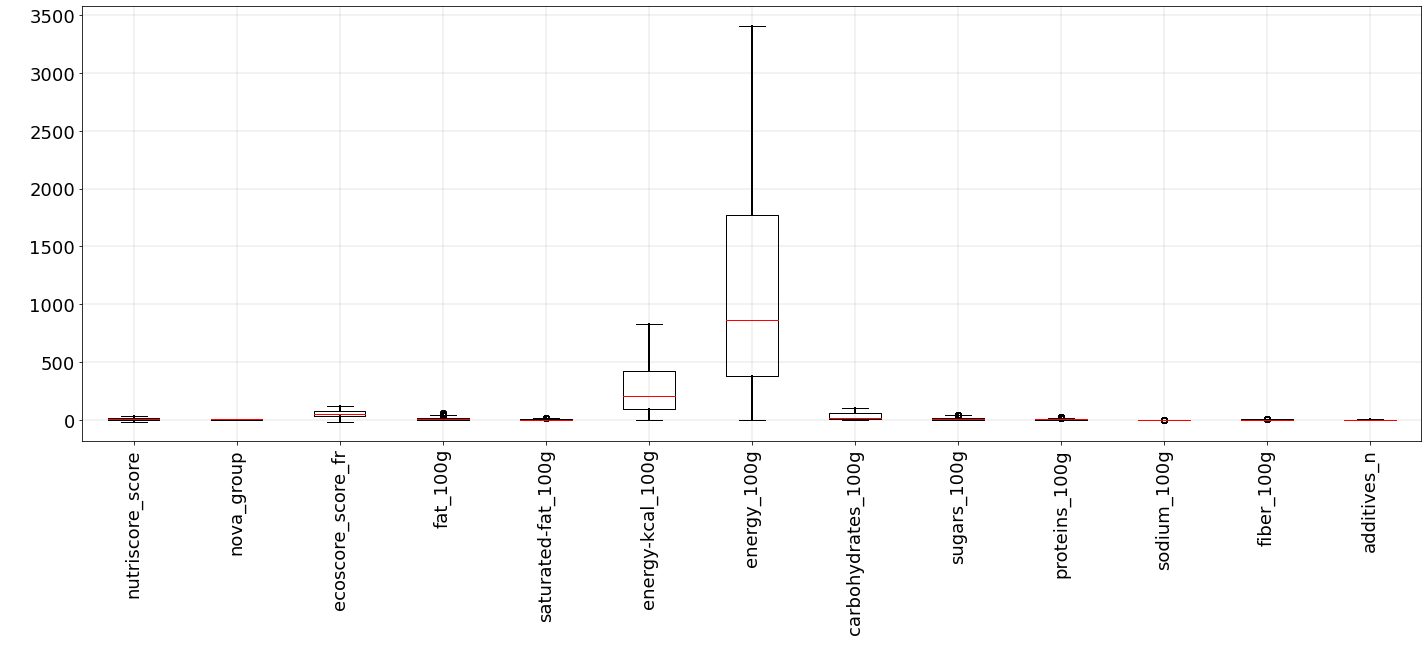

In [31]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('donnees_retenue.jpeg'))

ylabel = " "
xlabel = " "
ax = plot_box_plot(df_final,xlabel,ylabel,figure_name)

In [32]:
print(df_final.shape)

(52929, 19)


In [33]:
df_final.head()

,product_name,categories,nutriscore_grade,nutriscore_score,nova_group,ecoscore_grade_fr,ecoscore_score_fr,countries_en,fat_100g,saturated-fat_100g,energy-kcal_100g,energy_100g,carbohydrates_100g,sugars_100g,proteins_100g,sodium_100g,fiber_100g,additives_n,ingredients_text
8,BAguette bressan,"Aliments et boissons à base de végétaux, Alime...",a,-4.0,4.0,b,80.0,France,2.20,0.5,160.0,669.0,25.20,0.60,9.50,0.14,1.6,3.0,"Bâguette Bressan Pain baguette 46,2%,' farine ..."
31,Pesto à La Roquette Bio Kazidomi,"Epicerie, Sauces, Sauces Pesto",e,23.0,3.0,b,64.0,"Belgium,France",53.20,9.6,561.0,2318.0,11.70,0.50,8.20,1.08,1.3,0.0,Rucola à l'huile d'olive vierge extra* 39% (ru...
49,Sliced Plain Bagel,"Plant-based foods and beverages, Plant-based f...",c,3.0,4.0,b,79.0,United States,1.18,0.0,365.0,1527.0,71.76,4.71,12.94,0.48,2.4,0.0,"Unbleached enriched flour (wheat flour, barley..."
60,Pastille Vichy,"Snacks, Snacks sucrés, Confiseries, Bonbons, B...",c,3.0,4.0,d,28.0,France,0.00,0.0,250.0,1046.0,95.00,0.00,0.00,0.00,0.0,2.0,"Édulcorants (Sorbitol, Aspartame), agent d'enr..."
74,Crêpes jambon fromage,"Produits laitiers, Produits fermentés, Produit...",b,1.0,4.0,b,64.0,France,6.60,1.7,162.0,678.0,17.00,3.70,8.20,0.29,0.9,2.0,"Garniture sauce béchamel 60% (eau, jam - bon c..."


###  Pourcentage de données dans chaque classe de nutriscore

In [34]:
score_distribution= df_final.groupby(['nutriscore_grade']).count()
score_distribution['product_name']=100*score_distribution['product_name']/score_distribution['product_name'].sum()
score_distribution.drop(score_distribution.columns.difference(['nutriscore_grade','nutriscore_score','product_name']), 1, inplace=True)
score_distribution = score_distribution.rename({'nutriscore_score':"Nombre total de données",'product_name': "Nombre total de données [%]"}, axis=1)
score_distribution

,Nombre total de données [%],Nombre total de données
nutriscore_grade,,
a,23.48,12429
b,17.72,9380
c,22.60,11963
d,23.04,12194
e,13.16,6963


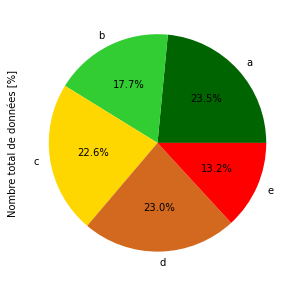

In [35]:
colors=['darkgreen','limegreen','gold','chocolate','red']
score_distribution.plot.pie(y='Nombre total de données [%]',figsize=(5, 5),autopct='%1.1f%%', legend=False, colors=colors)

  
figure_name =Path(str(dir_fig) +'/' + str(region) + str('donnees_count_nutrigrade.jpeg'))
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')   
   
    